# SSCWeb first steps

In [1]:
import speasy as spz
from speasy.inventory.data_tree import ssc as ssc_tree
%matplotlib widget
# Use this instead if you are not using jupyterlab yet
#%matplotlib notebook 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from astropy import units
import numpy as np

<AxesSubplot:>

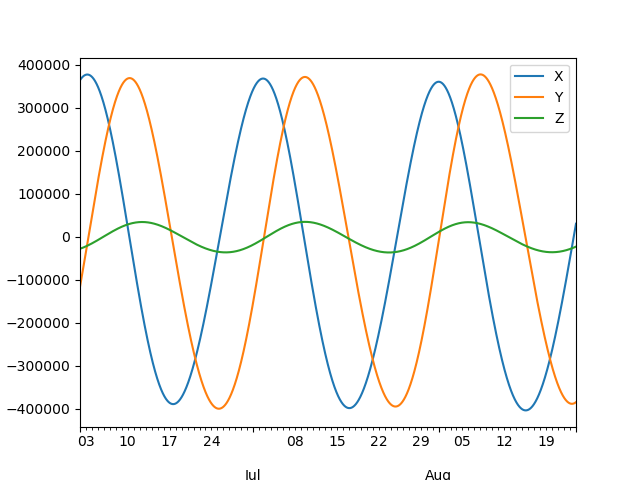

In [2]:
moon_orbit = spz.get_data(ssc_tree.Trajectories.moon, 
                         datetime(2019,6,2), datetime(2019,8,24), coordinate_system='gse')
moon_orbit.plot()

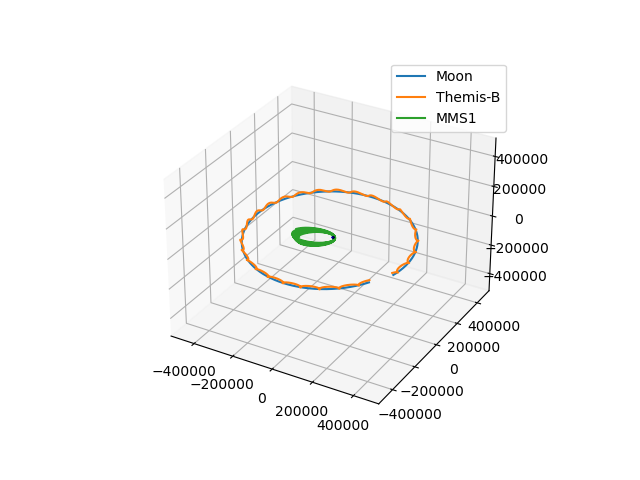

In [3]:
def plot_traj(var, ax, label):
    ax.plot(var.data[:,0],var.data[:,1],var.data[:,2], label=label)

def plot_earth(ax):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 6371 * np.outer(np.cos(u), np.sin(v))
    y = 6371 * np.outer(np.sin(u), np.sin(v))
    z = 6371 * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='b')

themisb_orbit = spz.get_data(ssc_tree.Trajectories.themisb, 
                         datetime(2019,6,2), datetime(2019,6,30), coordinate_system='gse')

mms1_orbit = spz.get_data(ssc_tree.Trajectories.mms1, 
                         datetime(2019,6,2), datetime(2019,6,30), coordinate_system='gse')

moon_orbit = spz.get_data(ssc_tree.Trajectories.moon, 
                         datetime(2019,6,2), datetime(2019,6,30), coordinate_system='gse')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_traj(moon_orbit, ax, 'Moon')
plot_traj(themisb_orbit, ax, 'Themis-B')
plot_traj(mms1_orbit, ax, 'MMS1')
plot_earth(ax)
ax.set_xlim(-50e4,50e4)
ax.set_ylim(-50e4,50e4)
ax.set_zlim(-50e4,50e4)
ax.legend()
plt.show()